#### 1. Converting audio data into a structured data form allows for easier analysis and manipulation. Here's a step-by-step guide on how to convert audio data into structured data using Python: ####

In [22]:
### Load the Audio Data
# You can use the `librosa` library to load audio files and extract various features from them.

# pip install librosa

import librosa
import librosa.display
from matplotlib import pyplot as plt
import IPython.display as ipd

In [25]:
# Load the audio file
y, sr = librosa.load("Jazzy_Piano_AI_Genrated.mp3")

# Play it
ipd.Audio("Jazzy_Piano_AI_Genrated.mp3")

In [ ]:
# Check contents
print(f"Audio content: {y}\nShape: {y.shape})")
print(f"Sample rate (sr): {sr}Hz")

# `y` contains the audio time series, and `sr` is the sampling rate.

Audio content: [-1.8626451e-09  9.3132257e-09  2.6077032e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Shape: (394560,))
Sample rate (sr): 22050Hz


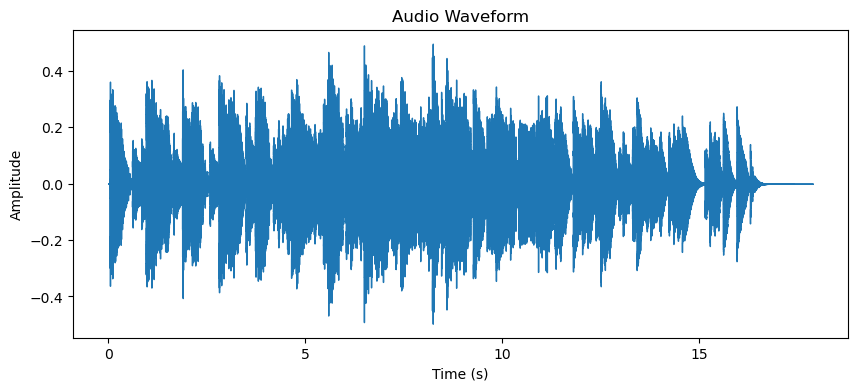

In [16]:
# Plot the wvaeform
plt.figure(figsize=(10, 4))

# Plot the waveform
librosa.display.waveshow(y, sr=sr)

# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

#### 2. Extract Basic Features ####

In [19]:
# Temporal Features:
# Zero Crossing Rate: Rate of sign-changes along a signal.

zcr = librosa.feature.zero_crossing_rate(y)
print(f"Number of ZCR: {len(zcr[0])}")

Number of ZCR: 771


In [20]:
# Spectral Features:
#Spectral Centroid: Indicates where the center of mass of the spectrum is located.

# A higher spectral centroid value indicates that a greater proportion of the sound's energy is concentrated in the higher frequencies
# resulting in a brighter sound.

# A lower value means the energy is concentrated in the lower frequencies, producing a softer, darker sound

spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Spectral Bandwidth: Width of the spectrum.
# A measure of the spread or dispersion of the frequency spectrum around its center.

spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
print(f"Spectral Centroid: {spectral_centroid[0][:5]}\n\nSpectral Bandwitdth: {spectral_bandwidth[0][:5]}")

Spectral Centroid: [2073.47805203 1886.96703118 1638.66522126 1403.62247313 1373.4561607 ]

Spectral Bandwitdth: [1984.54491935 1865.11270451 1725.30415468 1520.3436158  1431.94493356]


In [6]:
# Rhythmic Features:
# Tempo and Beat Frames: 
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo}\nBeat Frames: {beat_frames}")

Tempo: [86.1328125]
Beat Frames: [  3  37  64  93 122 152 182 212 241 267 296 326 356 386 416 450 480 509
 535 564 594 624 653 688]


#### 3. Extract Advanced Features

In [ ]:
# Mel-Frequency Cepstral Coefficients (MFCC):
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(f"Mel frequencies: {mfccs}\n\n")
print(f"Mel frequencies shape: {mfccs.shape}\n\n")

Mel frequencies: [[-252.03224   -112.311516   -92.087776  ... -608.2068    -608.2068
  -608.2068   ]
 [ 112.00982    122.214645   134.87956   ...    0.           0.
     0.       ]
 [ -35.69693    -38.44917    -38.05924   ...    0.           0.
     0.       ]
 ...
 [ -18.44199    -17.698841   -13.844763  ...    0.           0.
     0.       ]
 [  -8.856781    -6.9144096   -3.385375  ...    0.           0.
     0.       ]
 [  -7.451329    -6.0071354   -2.3631577 ...    0.           0.
     0.       ]]


Mel frequencies shape: (13, 771)


Number of Mel frequencies: 13


In [26]:
# Chroma Feature:
# Represents the energy distribution across the 12 different pitch classes.
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
print(f"Chroma - Energy Distribution:\n{chroma}")

Chroma - Energy Distribution:
[[0.3373423  0.20059502 0.20847654 ... 0.         0.         0.        ]
 [0.3868379  0.1566624  0.11533245 ... 0.         0.         0.        ]
 [0.50352967 0.25923964 0.12616844 ... 0.         0.         0.        ]
 ...
 [0.7244096  0.28927296 0.17195682 ... 0.         0.         0.        ]
 [0.9939257  0.54300505 0.38547286 ... 0.         0.         0.        ]
 [0.6190801  0.3097652  0.1608446  ... 0.         0.         0.        ]]


In [27]:
# Tonnetz:
# Captures harmonic relations in the audio.
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
print(f"Numner of harmonic relations: {len(tonnetz)}")

Numner of harmonic relations: 6


#### 4. Structured Data Representation ####

Once the features are extracted, they can be represented in a structured form such as a DataFrame using `pandas`.

This structured data form makes it easier to analyze the extracted audio features, use them in machine learning models, or store them in databases for further processing.

In [28]:
import pandas as pd

# Create a dictionary of features
data = {
    'Zero Crossing Rate': zcr.mean(),
    'Spectral Centroid': spectral_centroid.mean(),
    'Spectral Bandwidth': spectral_bandwidth.mean(),
    'Tempo': tempo,
    'MFCC1': mfccs[0].mean(),
    'MFCC2': mfccs[1].mean(),
    #... add other MFCCs or features as needed
    'Chroma1': chroma[0].mean(),
    'Chroma2': chroma[1].mean(),
    #... add other Chroma features as needed
    'Tonnetz1': tonnetz[0].mean(),
    'Tonnetz2': tonnetz[1].mean()
    #... add other Tonnetz features as needed
}

# Convert dictionary to DataFrame
df = pd.DataFrame([data])

In [29]:
# The dataframe contents
df

,Zero Crossing Rate,Spectral Centroid,Spectral Bandwidth,Tempo,MFCC1,MFCC2,Chroma1,Chroma2,Tonnetz1,Tonnetz2
0,0.070262,1138.468464,1120.419613,[86.1328125],-267.899902,149.944427,0.162666,0.206916,0.027278,0.186317
